## Human ACtivity Analysis Using ML

# **steps**:
1. imorting libraries
2. loading dataset
3. Printing missing values
4. Correlation matrix
5. Heatmap
6. Train test split
7. Finding most discriminatory variables
8. Univariate Analysis
9. Bivariate Analysis
10. Training Machine learning classifiers

*   LDA(LinearDiscriminantAnalysis).........(**Accuracy=96.2%**)
    1. printing accuracy, precision ,recall,f1-score, support

*   ANN(Neural Network)........(**Accuracy=95%**)
    1. print accuracy, precision ,recall,f1-score, support

*   XGB classifier...........(**Accuracy=92%**)
    1. print accuracy, precision ,recall,f1-score, support
*   SVM(with Default parameters)(**Accuracy=95.6%**)
    1. print accuracy, precision ,recall,f1-score, support

*   SVM(With Hyperparameter selection).......(**Accuracy=96%**)
    1. print accuracy, precision ,recall,f1-score, support

*   Random Forest algo...........(**Accuracy=92%**)
    1. print accuracy, precision ,recall,f1-score, support

*   Hyperparameter Selection For random forest algorithm

11. Implementing hard voting...........(**Accuracy=96.6%**)
    1. print accuracy, precision ,recall,f1-score, support

importing necessary libraries

In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from sklearn.metrics import f1_score

loding datasets

In [2]:
test = pd.read_csv("/content/drive/MyDrive/Program 3 (Machine learning) activity data/Program 3 (Machine learning) activity data/test.csv")
train = pd.read_csv("/content/drive/MyDrive/Program 3 (Machine learning) activity data/Program 3 (Machine learning) activity data/train.csv")

# New Section
Missing values

In [3]:
missing_value_train=train.isna()
missing_value_test=test.isna()

In [4]:
print("Missing values in training set:(%)")
print((missing_value_train/len(train))*100)
print("Missing values in test set:(%)")
print((missing_value_test/len(test))*100)

Missing values in training set:(%)
      tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0                   0.0                0.0                0.0   
1                   0.0                0.0                0.0   
2                   0.0                0.0                0.0   
3                   0.0                0.0                0.0   
4                   0.0                0.0                0.0   
...                 ...                ...                ...   
7347                0.0                0.0                0.0   
7348                0.0                0.0                0.0   
7349                0.0                0.0                0.0   
7350                0.0                0.0                0.0   
7351                0.0                0.0                0.0   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0                  0.0               0.0               0.0               0.0   
1                  0.0  

Displaying correlation Matrix

In [5]:
cor=train.corr()
display(cor)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
tBodyAcc-mean()-X,1.000000,0.148061,-0.256952,0.000619,-0.021903,-0.044617,0.006290,-0.022754,-0.047558,0.044062,...,-0.017557,-0.015613,-0.544320,0.012173,0.037444,0.028844,-0.035257,0.034371,0.028242,0.024181
tBodyAcc-mean()-Y,0.148061,1.000000,-0.078769,-0.045160,-0.044920,-0.049746,-0.044180,-0.045049,-0.050402,-0.038108,...,-0.001587,-0.004459,0.070559,-0.013541,0.017967,0.075679,-0.005309,0.001053,-0.013903,-0.003144
tBodyAcc-mean()-Z,-0.256952,-0.078769,1.000000,-0.020217,-0.016641,-0.008410,-0.018747,-0.015203,-0.001988,-0.037197,...,0.020091,0.019127,0.052841,-0.039836,-0.063609,-0.034037,0.008587,-0.015288,-0.022643,-0.000637
tBodyAcc-std()-X,0.000619,-0.045160,-0.020217,1.000000,0.927461,0.851668,0.998632,0.920888,0.846392,0.980844,...,0.148034,0.115565,-0.035011,-0.021633,0.018985,-0.024810,-0.371653,0.471065,0.394825,-0.064345
tBodyAcc-std()-Y,-0.021903,-0.044920,-0.016641,0.927461,1.000000,0.895510,0.922803,0.997347,0.894509,0.917366,...,0.206227,0.176946,-0.020379,-0.012505,-0.008507,-0.014592,-0.380531,0.523600,0.433169,-0.115524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"angle(tBodyGyroJerkMean,gravityMean)",0.028844,0.075679,-0.034037,-0.024810,-0.014592,-0.006471,-0.024951,-0.012341,-0.007231,-0.028871,...,-0.017937,-0.014865,-0.020823,0.035263,-0.116001,1.000000,0.023995,-0.005869,-0.005656,0.009340
"angle(X,gravityMean)",-0.035257,-0.005309,0.008587,-0.371653,-0.380531,-0.345011,-0.368191,-0.377025,-0.347389,-0.384192,...,-0.086006,-0.079751,0.011880,0.023246,-0.005853,0.023995,1.000000,-0.783848,-0.643655,0.026137
"angle(Y,gravityMean)",0.034371,0.001053,-0.015288,0.471065,0.523600,0.476006,0.466424,0.525081,0.477607,0.480229,...,0.086993,0.078079,0.001540,-0.012990,-0.012313,-0.005869,-0.783848,1.000000,0.594885,-0.009829
"angle(Z,gravityMean)",0.028242,-0.013903,-0.022643,0.394825,0.433169,0.482828,0.390922,0.431459,0.479751,0.405023,...,0.057831,0.052548,-0.003069,-0.017520,-0.019903,-0.005656,-0.643655,0.594885,1.000000,-0.098712


In [6]:
plt.figure(figsize=(60,70))
sns.heatmap(cor,annot=True)
plt.show()

Calculating absolute correlation values

In [7]:
abs_corr=cor.abs()

Shows the most discriminatory(zero cprrelated features)

In [9]:
abs_corr.idxmin()

tBodyAcc-mean()-X                       fBodyAccJerk-bandsEnergy()-57,64.1
tBodyAcc-mean()-Y                                    fBodyAcc-kurtosis()-X
tBodyAcc-mean()-Z                                   tBodyAcc-arCoeff()-Z,4
tBodyAcc-std()-X                                         tBodyAcc-mean()-X
tBodyAcc-std()-Y                                tBodyAccJerk-arCoeff()-X,2
                                                       ...                
angle(tBodyGyroJerkMean,gravityMean)                   tGravityAcc-iqr()-Y
angle(X,gravityMean)                                 tBodyAccJerk-mean()-Z
angle(Y,gravityMean)                                fBodyGyro-kurtosis()-X
angle(Z,gravityMean)                                tBodyGyroJerk-mean()-X
subject                                 fBodyAccJerk-bandsEnergy()-33,40.2
Length: 562, dtype: object

# New Section
Univariate Analysis

finding mean ,standard deviation, min value, max value

In [10]:
train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [11]:
test.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,...,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000
mean,0.273996,-0.017863,-0.108386,-0.613635,-0.508330,-0.633797,-0.641278,-0.522676,-0.637038,-0.462063,...,-0.277593,-0.598756,0.005264,0.003799,0.040029,-0.017298,-0.513923,0.074886,-0.048720,12.986427
std,0.060570,0.025745,0.042747,0.412597,0.494269,0.362699,0.385199,0.479899,0.357753,0.523916,...,0.317245,0.311042,0.336147,0.445077,0.634989,0.501311,0.509205,0.324300,0.241467,6.950984
min,-0.592004,-0.362884,-0.576184,-0.999606,-1.000000,-0.998955,-0.999417,-0.999914,-0.998899,-0.952357,...,-1.000000,-1.000000,-1.000000,-0.993402,-0.998898,-0.991096,-0.984195,-0.913704,-0.949228,2.000000
25%,0.262075,-0.024961,-0.121162,-0.990914,-0.973664,-0.976122,-0.992333,-0.974131,-0.975352,-0.934447,...,-0.517494,-0.829593,-0.130541,-0.282600,-0.518924,-0.428375,-0.829722,0.022140,-0.098485,9.000000
50%,0.277113,-0.016967,-0.108458,-0.931214,-0.790972,-0.827534,-0.937664,-0.799907,-0.817005,-0.852659,...,-0.311023,-0.683672,0.005188,0.006767,0.047113,-0.026726,-0.729648,0.181563,-0.010671,12.000000
75%,0.288097,-0.010143,-0.097123,-0.267395,-0.105919,-0.311432,-0.321719,-0.133488,-0.322771,-0.009965,...,-0.083559,-0.458332,0.146200,0.288113,0.622151,0.394387,-0.545939,0.260252,0.092373,18.000000
max,0.671887,0.246106,0.494114,0.465299,1.000000,0.489703,0.439657,1.000000,0.427958,0.786436,...,1.000000,1.000000,0.998898,0.986347,1.000000,1.000000,0.833180,1.000000,0.973113,24.000000


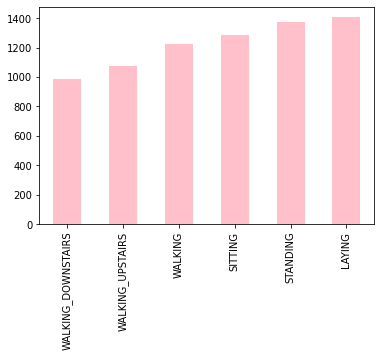

In [12]:
train['Activity'].value_counts().sort_values().plot(kind = 'bar', color = 'pink')

Bivariate Analysis

In [94]:

px.histogram(data_frame=train, x="subject", color="Activity",barmode='group')

In [15]:
fig = px.histogram (df,x="Activity", y="subject",width=1200,color='Activity')
fig.update_layout(barmode='group')
fig.show()

In [16]:
fig = px.box(df, y='subject', x="Activity",color="Activity",width=1200,boxmode="overlay",)
fig.show()

In [18]:
px.histogram(data_frame=df,
             x='tBodyAcc-mean()-X',
             y="Activity",
             color='Activity', 
             histnorm='probability density',
             )

In [19]:
fig = px.box(df, y='tBodyAccMag-mean()', x="Activity",color="Activity",width=1200,boxmode="overlay",)
fig.show()

Splitting data into train ,test for dependent and independent variable

In [20]:
y_train = train.Activity
X_train = train.drop(['subject', 'Activity'], axis=1)
y_test = test.Activity
X_test = test.drop(['subject', 'Activity'], axis=1)
print('Training data size : ', X_train.shape)
print('Test data size : ', X_test.shape)

Training data size :  (7352, 561)
Test data size :  (2947, 561)


labeling output variable

In [21]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

1. LDA(LinearDiscriminantAnalysis)

In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score

In [35]:
predictLDA =  LDA.predict(X_test)
print(classification_report(predictLDA,y_test))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.88      0.95      0.92       456
          STANDING       0.96      0.90      0.93       566
           WALKING       0.99      0.98      0.98       502
WALKING_DOWNSTAIRS       0.96      1.00      0.98       405
  WALKING_UPSTAIRS       0.98      0.96      0.97       481

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [37]:
acc_LDA=accuracy_score(predictLDA,y_test)
print(acc_LDA)

0.9623345775364778


2.Neural Network

In [40]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', alpha=1e-08,hidden_layer_sizes=(25,),activation='tanh', random_state=2,batch_size='auto',)
clf = clf.fit(X_train, y_train)
predictCLF = clf.predict(X_test)

In [41]:
print(classification_report(predictCLF,y_test))


                    precision    recall  f1-score   support

            LAYING       0.98      1.00      0.99       524
           SITTING       0.88      0.97      0.92       443
          STANDING       0.97      0.88      0.92       589
           WALKING       0.98      0.95      0.97       513
WALKING_DOWNSTAIRS       0.94      0.97      0.96       408
  WALKING_UPSTAIRS       0.95      0.95      0.95       470

          accuracy                           0.95      2947
         macro avg       0.95      0.95      0.95      2947
      weighted avg       0.95      0.95      0.95      2947



In [42]:
acc_CLF=accuracy_score(predictCLF,y_test)
print(acc_CLF)

0.9507974211062097


3. XGB classifier

In [43]:
from xgboost import XGBClassifier
xgb_params = {'n_estimators': 100,
              'learning_rate': 0.2,
              'subsample': 0.927,
              'colsample_bytree': 0.88,
              'max_depth': 5,
              'booster': 'gbtree', 
              'reg_lambda': 38,
              'reg_alpha': 32,
              'random_state': 12}
model = XGBClassifier(**xgb_params)
model.fit(X_train, y_train)

XGBClassifier(colsample_bytree=0.88, learning_rate=0.2, max_depth=5,
              objective='multi:softprob', random_state=12, reg_alpha=32,
              reg_lambda=38, subsample=0.927)

In [44]:
predictXGB = model.predict(X_test)
print(classification_report(predictXGB,y_test))


                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.85      0.90      0.87       463
          STANDING       0.92      0.87      0.89       558
           WALKING       0.98      0.92      0.95       533
WALKING_DOWNSTAIRS       0.87      0.96      0.92       382
  WALKING_UPSTAIRS       0.91      0.90      0.90       474

          accuracy                           0.92      2947
         macro avg       0.92      0.93      0.92      2947
      weighted avg       0.93      0.92      0.92      2947



In [45]:
acc_XGB=accuracy_score(predictXGB, y_test)
acc_XGB

0.9239904988123515

4. Support VEctor machine Classifier(SVM)

In [46]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
# import metrics to compute accuracy (Evulate)
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

In [47]:
svc=SVC()

In [48]:
svc.fit(X_train,y_train)

SVC()

In [78]:
y_predsvc=svc.predict(X_test)

In [50]:
# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9505


In [79]:
print(classification_report(y_predsvc,y_test))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.89      0.94      0.91       467
          STANDING       0.95      0.91      0.93       554
           WALKING       0.98      0.94      0.96       518
WALKING_DOWNSTAIRS       0.91      0.99      0.95       387
  WALKING_UPSTAIRS       0.96      0.93      0.94       484

          accuracy                           0.95      2947
         macro avg       0.95      0.95      0.95      2947
      weighted avg       0.95      0.95      0.95      2947



Now Some Hyperparameter where kernel use rbf and C=100.0

In [80]:
svc2=SVC(kernel='rbf',C=100.0)
# fit classifier to training set
svc2.fit(X_train,y_train)

# make predictions on test set
y_pred2 = svc2.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred2)))

Model accuracy score with rbf kernel and C=100.0 : 0.9654


In [88]:
svc_acc=accuracy_score(y_test, y_pred2)


In [52]:
rand_clf=RandomForestClassifier(random_state=5)

In [53]:
rand_clf.fit(X_train,y_train)

RandomForestClassifier(random_state=5)

In [54]:
rand_clf.score(X_test,y_test)

0.9216152019002375

In [81]:
y_pred_rfc=rand_clf.predict(X_test)

In [83]:
print(classification_report(y_pred_rfc,y_test))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.88      0.90      0.89       481
          STANDING       0.91      0.89      0.90       542
           WALKING       0.96      0.89      0.93       536
WALKING_DOWNSTAIRS       0.85      0.95      0.90       376
  WALKING_UPSTAIRS       0.90      0.89      0.90       475

          accuracy                           0.92      2947
         macro avg       0.92      0.92      0.92      2947
      weighted avg       0.92      0.92      0.92      2947



Hyperparameter Selection For random forest algorithm

Hyperparameters of Random Forest Classifier:
These are the parameters

1.   max_depth: The max_depth of a tree in Random Forest is defined 
as the longest path between the root node and the leaf node.
2.   max_leaf_nodes: This hyperparameter sets a condition on the splitting of the nodes in the tree and hence restricts the growth of the tree.
3.   min_samples_leaf: This Random Forest hyperparameter specifies the minimum number of samples that should be present in the leaf node after splitting a node. Default = 1
4.  n_estimators: Number of trees in the forest. 

5. max_sample: The max_samples hyperparameter determines what fraction of the original dataset is given to any individual tree.
6. max_features: This resembles the number of maximum features provided to each tree in a random forest.
bootstrap: Method for sampling data points (with or without replacement). Default = True
7. criterion: The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

Now, manually setting the hyperparameters, and using GridSearchCV for Hyperparameter Tuning:

In [55]:
grid_param={
    'n_estimators':[90,100,115,130],
    'criterion':['gini','entropy'],
    'max_depth':range(2,20,1),
    'min_samples_leaf':range(1,10,1),
    'min_samples_split':range(2,10,1),
    'max_features':['auto','log2']
}

In [56]:
grid_search=GridSearchCV(estimator=rand_clf,param_grid=grid_param,cv=5,n_jobs=-1,verbose=3)

# New Section
Implementing Hard Voting

In [65]:
# import voting classifier
from sklearn.ensemble import VotingClassifier

# create a voting classifier with hard voting
voting_classifier_hard = VotingClassifier(
    estimators = [('LDA',LinearDiscriminantAnalysis()),
                  ('CLF', MLPClassifier( random_state=2 )),
                  ('XGB', XGBClassifier())
                 ], 
    voting='hard')

Prediction by hard voting classifier

In [70]:
voting_classifier_hard.fit(X_train, y_train)
y_pred_vch = voting_classifier_hard.predict(X_test)


In [71]:
print(classification_report(y_pred_vch,y_test))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.90      0.96      0.93       462
          STANDING       0.96      0.92      0.94       559
           WALKING       0.99      0.97      0.98       508
WALKING_DOWNSTAIRS       0.96      0.99      0.98       406
  WALKING_UPSTAIRS       0.97      0.96      0.96       475

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947

